**Entendimiento de datos**

- tipo de dato
- problema en el dato

In [70]:
import pandas as pd
mark = pd.read_csv(r'C:\Users\olive\Documents\DataScience\ficheros-clase\MarketingDirecto.csv',sep=",")

In [71]:
mark.head()

,Edad,Genero,Vivienda,Ecivil,Ubicacion,Salario,Hijos,Historial,Catalogos,Monto
0,Adulta,Femenino,Propia,Soltero,Lejos,47500,0,Alto,6,755
1,Media,Masculino,Alquilada,Soltero,Cerca,63600,0,Alto,6,1318
2,Joven,Femenino,Alquilada,Soltero,Cerca,13500,0,Bajo,18,296
3,Media,Masculino,Propia,Casado,Cerca,85600,1,Alto,18,2436
4,Media,Femenino,Propia,Soltero,Cerca,68400,0,Alto,12,1304


**Codificación**

In [72]:
from collections import defaultdict #crea por defecto diccionario
from sklearn.preprocessing import LabelEncoder #codificación 
import numpy as np

In [73]:
mark.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Edad       1000 non-null   object
 1   Genero     1000 non-null   object
 2   Vivienda   1000 non-null   object
 3   Ecivil     1000 non-null   object
 4   Ubicacion  1000 non-null   object
 5   Salario    1000 non-null   int64 
 6   Hijos      1000 non-null   int64 
 7   Historial  697 non-null    object
 8   Catalogos  1000 non-null   int64 
 9   Monto      1000 non-null   int64 
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


**Se seleccionan los Dtype tipo object**

In [74]:
objeto_list = list(mark.columns.to_series().groupby(mark.dtypes).groups[np.dtype("object")])

In [75]:
#estas son las variables que voy a codificar
print(objeto_list) 

['Edad', 'Genero', 'Vivienda', 'Ecivil', 'Ubicacion', 'Historial']


**Codificación de mark**

In [76]:
d = defaultdict(LabelEncoder)

In [77]:
mark_v2 = mark.apply(lambda x:d[x.name].fit_transform(x) if x.name in objeto_list else x)

In [78]:
mark_v2.head(n=3)

,Edad,Genero,Vivienda,Ecivil,Ubicacion,Salario,Hijos,Historial,Catalogos,Monto
0,0,0,1,1,1,47500,0,0,6,755
1,2,1,0,1,0,63600,0,0,6,1318
2,1,0,0,1,0,13500,0,1,18,296


In [79]:
#femenino = 0
#masculino = 1

### Explicacion de la funcion fit y la función trasnform

- fit(): aprendizaje
- fit_transform(): aprendizaje + transformación
- transform(): transformación

In [80]:
fit = mark.apply(lambda x:d[x.name].fit(x) if x.name in objeto_list else x)

In [81]:
mark_transform = mark.apply(lambda x:d[x.name].transform(x) if x.name in objeto_list else x)

In [82]:
mark_transform.head(n=3)

,Edad,Genero,Vivienda,Ecivil,Ubicacion,Salario,Hijos,Historial,Catalogos,Monto
0,0,0,1,1,1,47500,0,0,6,755
1,2,1,0,1,0,63600,0,0,6,1318
2,1,0,0,1,0,13500,0,1,18,296


### Validación del resultado de la codificación en la variable Edad

In [83]:
#femenino = 0
#masculino = 1

In [84]:
edad = list(d["Edad"].classes_)
edad

['Adulta', 'Joven', 'Media']

In [85]:
codificacion = d["Edad"].transform(d["Edad"].classes_)
codificacion

array([0, 1, 2])

In [86]:
########################################################
#Diccionario de la variable edad

In [87]:
pd.DataFrame({"Edad":edad,"Código":codigo})

,Edad,Código
0,Adulta,0
1,Joven,1
2,Media,2


**Particionamiento de los datos**

- train: datos que son proporcionados para que algoritmo (modeloe ML) desarrolle un proceso de aprendizaje
- test: evaluar su proceso de aprendizaje

In [88]:
mark_v2.head(n=3)

,Edad,Genero,Vivienda,Ecivil,Ubicacion,Salario,Hijos,Historial,Catalogos,Monto
0,0,0,1,1,1,47500,0,0,6,755
1,2,1,0,1,0,63600,0,0,6,1318
2,1,0,0,1,0,13500,0,1,18,296


In [89]:
from sklearn.model_selection import train_test_split

In [90]:
# Variables predictoras <> Monto
x = mark_v2.iloc[:,0:9].values
# Variable objetivo = Monto
y = mark_v2.iloc[:,9].values

In [91]:
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=0)#semilla

**Nota**: 10% al 30% de los datos se suelen utilizar para testear el modelo

**Imputación**

In [92]:
import pandas as pd

In [93]:
mark = pd.read_csv(r'C:\Users\olive\Documents\DataScience\ficheros-clase\MarketingDirecto.csv',sep=",")

In [94]:
mark.head(n=5)

,Edad,Genero,Vivienda,Ecivil,Ubicacion,Salario,Hijos,Historial,Catalogos,Monto
0,Adulta,Femenino,Propia,Soltero,Lejos,47500,0,Alto,6,755
1,Media,Masculino,Alquilada,Soltero,Cerca,63600,0,Alto,6,1318
2,Joven,Femenino,Alquilada,Soltero,Cerca,13500,0,Bajo,18,296
3,Media,Masculino,Propia,Casado,Cerca,85600,1,Alto,18,2436
4,Media,Femenino,Propia,Soltero,Cerca,68400,0,Alto,12,1304


In [95]:
mark.isnull().sum()/len(mark)*100

Edad          0.0
Genero        0.0
Vivienda      0.0
Ecivil        0.0
Ubicacion     0.0
Salario       0.0
Hijos         0.0
Historial    30.3
Catalogos     0.0
Monto         0.0
dtype: float64

**Nivel de perdida de información**

- 0.1% a 1% valores faltantes: perdida es trivial (insignificante).
- 1% a 5% valores faltantes: requieren de una técnica para recuperar información (media, moda, mediana, vecinos más cercanos).
- 5% a 30% valores faltantes: requieren de modelos más sofisticados (modelos de ML) para recuperar la información.

**tres estrategias frente a la ausencia de valores**

- eliminar las filas con valores faltantes
- imputar: reemplazar los valores faltantes por valores calculados
- mantener: modelos de aprendizaje que tratan a los valores faltantes

In [96]:
from sklearn.impute import SimpleImputer
import numpy as np

In [97]:
imp_moda = SimpleImputer(missing_values=np.nan,#valores faltantes
                        strategy="most_frequent")#most_frequent(moda), mean(media), median(mediana)

In [98]:
imp_media = SimpleImputer(missing_values=np.nan,#valores faltantes
                        strategy="mean")

In [99]:
imp_mediana = SimpleImputer(missing_values=np.nan,#valores faltantes
                        strategy="median")

In [100]:
mark[["Historial_imp_moda"]]=imp_moda.fit_transform(mark[["Historial"]])

In [101]:
mark.isnull().sum()/len(mark)*100

Edad                   0.0
Genero                 0.0
Vivienda               0.0
Ecivil                 0.0
Ubicacion              0.0
Salario                0.0
Hijos                  0.0
Historial             30.3
Catalogos              0.0
Monto                  0.0
Historial_imp_moda     0.0
dtype: float64

In [102]:
import seaborn as sns
import random

In [103]:
import matplotlib.pyplot as plt

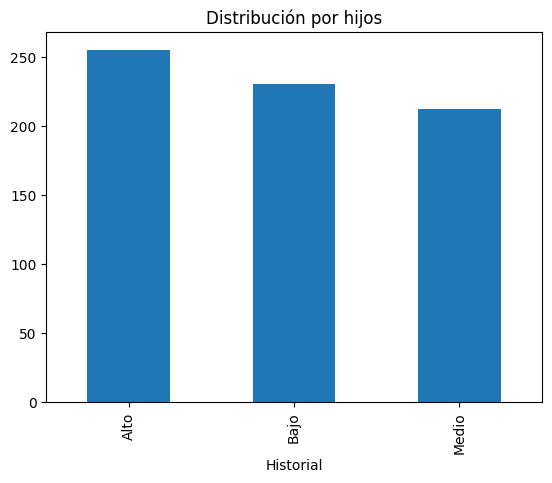

In [104]:
# Grafico del número de hijo
mark.groupby('Historial').size().plot(kind='bar')
plt.title('Distribución por hijos')
plt.show()

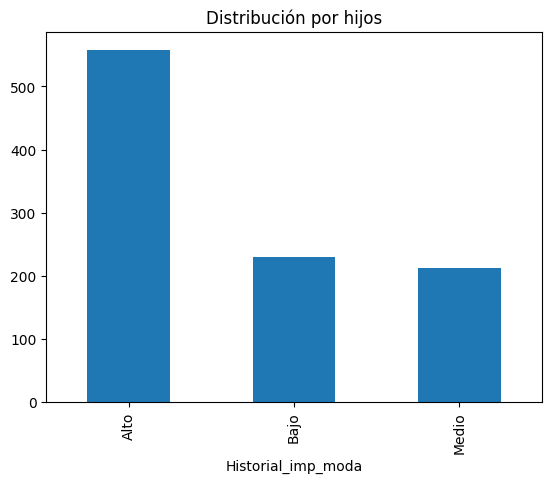

In [105]:
# Grafico del número de hijo
mark.groupby('Historial_imp_moda').size().plot(kind='bar')
plt.title('Distribución por hijos')
plt.show()

In [106]:
mark[["Monto_imp_media"]]=imp_media.fit_transform(mark[["Monto"]])

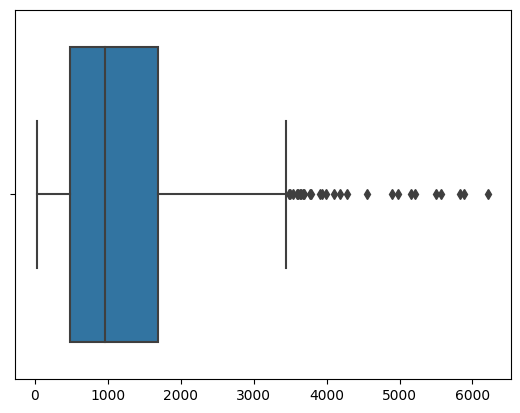

In [107]:
sns.boxplot(x=list(mark["Monto"]))
plt.show()

In [ ]:
sns.boxplot(x=list(mark["Monto_imp_media"]))
plt.show()

**Técnicas supervisadas de imputación**

**imputación por regresión**: variables cuantitativas

In [ ]:
mark.plot.scatter(x="Salario",y="Monto")
plt.show()

**Nota**: gráfica de dispersión se muestra una relación lineal entre las variables "Monto" y "Salario"

**Paso 1: crear el conjunto de datos donde la variable "Monto" presente valores faltantes**

In [ ]:
es_nulo = pd.isna(mark.loc[:,"Monto"])

In [ ]:
#True: valores faltantes

In [ ]:
df_nulos = mark.loc[es_nulo]

In [ ]:
df_nulos.head()

**Paso 2: crear el conjunto de datos donde la variable monto presente valores completos**

In [ ]:
no_nulo = es_nulo.replace({True:False, False:True})

In [ ]:
#True: valores completos

In [ ]:
df_data = mark.loc[no_nulo]

In [ ]:
df_data.head()

- df_data: para entrenar el modelo que permitirá recuperar la información de la variables "Monto"
- df_nulos: utilizariamos para recuperar la información de la variable "Monto"

**Paso 3: imputación por modelo de regresión**

In [ ]:
x=df_data[["Salario"]]
y=df_data[["Monto"]]

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
regresion = LinearRegression()

In [ ]:
regresion.fit(x,y)

**Paso 4: recupero información de Monto**

In [ ]:
df_nulos[["Monto"]]=np.round(regresion.predict(df_nulos[["Salario"]]),0)

In [ ]:
df_nulos

**Paso 5: resetear los index**

In [ ]:
df_nulos = df_nulos.reset_index(drop=True)

In [ ]:
df_data = df_data.reset_index(drop=True)

**Paso 6: concatenar el df_nulos (imputado) con el df_data (entrenamiento)**

In [ ]:
df_imputado = pd.concat([df_data,df_nulos], axis=0)

In [ ]:
df_imputado.isnull().sum()

**Imputación por modelo de clasificación**

**Paso 1**

In [ ]:
es_nulo = pd.isna(df_imputado.loc[:,"Historial"])

In [ ]:
df_nulos = df_imputado.loc[es_nulo]

In [ ]:
df_nulos.head()

**Paso 2**

In [ ]:
no_nulo = es_nulo.replace({True:False, False:True})

In [ ]:
df_data = df_imputado.loc[no_nulo]

In [ ]:
df_data.head()

**Paso 3: codificar**

In [ ]:
x = df_data[["Edad","Genero","Ecivil"]]
y = df_data[["Historial"]]

In [ ]:
x_test = df_nulos[["Edad","Genero","Ecivil"]]
y_test = df_nulos[["Historial"]]

In [ ]:
from collections import defaultdict
from sklearn.preprocessing import LabelEncoder
d=defaultdict(LabelEncoder)

**fit()**

In [ ]:
fit = x.apply(lambda x: d[x.name].fit(x))

**transform()**

In [ ]:
x = x.apply(lambda x: d[x.name].transform(x))

In [ ]:
x_test = x_test.apply(lambda x: d[x.name].transform(x))

**Paso 4: aprendizaje por árboles**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
arboles = DecisionTreeClassifier(random_state=2023)

In [ ]:
arboles.fit(x,y)

In [ ]:
df_nulos[["Historial"]]=arboles.predict(x_test)

In [ ]:
df_nulos.head()

**Paso 5: reset index**

In [ ]:
df_nulos = df_nulos.reset_index(drop=True)

In [ ]:
df_data = df_data.reset_index(drop=True)

**Paso 6: concatenar df**

In [ ]:
df_imputado2=pd.concat([df_nulos,df_data],axis=0)
#axis=0 (filas)
#axis=1 (columnas)

In [ ]:
df_imputado2.isnull().sum()

In [ ]:
# Grafico del número de hijo
mark.groupby('Historial_imp_moda').size().plot(kind='bar')
plt.title('Distribución por hijos')
plt.show()

In [ ]:
# Grafico del número de hijo
df_imputado2.groupby('Historial').size().plot(kind='bar')
plt.title('Distribución por hijos')
plt.show()

In [ ]:
# Grafico del número de hijo
mark.groupby('Historial').size().plot(kind='bar')
plt.title('Distribución por hijos')
plt.show()

**Balanceo de datos**

- problema que afecta el comportamiento de la variable objetivo
- se aplica para los casos de modelos de clasificación

In [ ]:
95% no fallan
5% fallan

**Nota**: va a realizar mejor predicciones de los motores que no fallan.

In [ ]:
data = pd.read_csv("D:/Python/1. Nivel I/7/datos/Grid v1.csv")

In [ ]:
data.head()

In [ ]:
from imblearn.under_sampling import NearMiss
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek
import sklearn
import os

**Columna incidentes** que es la columna objetivo que muestra el número de reclamos por zona

In [ ]:
data = data.loc[(data["rsrp"]<0)]

In [ ]:
data.head()

In [ ]:
data= data.reset_index(drop=True)

In [ ]:
data.head()

In [ ]:
pd.value_counts(data["incidentes"])

In [ ]:
data["incidentes"]=data["incidentes"].replace([2,3,4,5,6,7],1)

In [ ]:
(pd.value_counts(data["incidentes"])/len(data)*100)

In [ ]:
(pd.value_counts(data["incidentes"])/len(data)*100).plot(kind="bar")
plt.show()

In [ ]:
data = data[["rsrp","redireccion","cqi","incidentes"]]

In [ ]:
data.head()

- A. Balanceamos toda la data
- B. Balanceamos unicamente los datos de entrenamiento

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x=data.iloc[:,0:3].values
y=data.iloc[:,3].values

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,
                                                   y,
                                                   test_size=0.3,
                                                   random_state=2023)

**Balanceo por UnderSampling**

In [ ]:
pd.value_counts(y_train)

In [ ]:
us = RandomUnderSampler(sampling_strategy=1,#0.5; 0.6; 0.7; 0.8; 0.9; 1
                       random_state=0)

In [ ]:
x_under_s, y_under_s = us.fit_resample(x_train, y_train)

In [ ]:
pd.value_counts(y_under_s)

In [ ]:
round(1046/1307,2)

In [ ]:
val = [0.5, 0.6, 0.7, 0.8, 0.9, 1]

In [ ]:
df_metrics = pd.DataFrame({"sampling_strategy":[],"auc":[]})

In [ ]:
for i in val:
    us=RandomUnderSampler(sampling_strategy=i,
                       random_state=0)
    x_under_s, y_under_s = us.fit_resample(x_train, y_train)
    from sklearn.tree import DecisionTreeClassifier
    clf=DecisionTreeClassifier(random_state=0)
    clf=clf.fit(x_under_s,y_under_s)
    strategy=i
    y_predict=clf.predict(x_test)
    from sklearn.metrics import roc_auc_score # toma valores de 0 a 1 mientras más cercano a 1 es mejor el modelo
    auc=roc_auc_score(y_test,
                     y_predict)
    df=pd.DataFrame({"sampling_strategy":[strategy],"auc":[auc]})
    df_metrics = pd.concat([df_metrics,df], 
                           axis=0)

In [ ]:
df_metrics[df_metrics.auc==max(df_metrics.auc)]

**Balanceo por OverSampling**

In [ ]:
pd.value_counts(y_train)

In [ ]:
os = RandomOverSampler(sampling_strategy=1,#0.5; 0.6; 0.7; 0.8; 0.9; 1
                       random_state=0)

In [ ]:
x_over_s, y_over_s = os.fit_resample(x_train, y_train)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
clf=DecisionTreeClassifier(random_state=0)

In [ ]:
clf=clf.fit(x_over_s, y_over_s)

In [ ]:
y_predict=clf.predict(x_test)

In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
auc=roc_auc_score(y_test,
                     y_predict)

In [ ]:
print(auc)

In [ ]:
pd.value_counts(y_over_s)

In [ ]:
val = [0.5, 0.6, 0.7, 0.8, 0.9, 1]

In [ ]:
df_metrics = pd.DataFrame({"sampling_strategy":[],"auc":[]})

In [ ]:
for i in val:
    os=RandomOverSampler(sampling_strategy=i,
                       random_state=0)
    x_over_s, y_over_s = os.fit_resample(x_train, y_train)
    from sklearn.tree import DecisionTreeClassifier
    clf=DecisionTreeClassifier(random_state=0)
    clf=clf.fit(x_over_s, y_over_s)
    strategy=i
    y_predict=clf.predict(x_test)
    from sklearn.metrics import roc_auc_score # toma valores de 0 a 1 mientras más cercano a 1 es mejor el modelo
    auc=roc_auc_score(y_test,
                     y_predict)
    df=pd.DataFrame({"sampling_strategy":[strategy],"auc":[auc]})
    df_metrics = pd.concat([df_metrics,df], 
                           axis=0)

In [ ]:
df_metrics

In [ ]:
df_metrics[df_metrics.auc==max(df_metrics.auc)]

**Balanceo por Smote and Tomek**

In [ ]:
pd.value_counts(y_train)

In [ ]:
st = SMOTETomek(sampling_strategy=1,random_state=0)

In [ ]:
x_st, y_st= st.fit_resample(x_train,y_train)

In [ ]:
pd.value_counts(y_st)

In [ ]:
val = [0.5, 0.6, 0.7, 0.8, 0.9, 1]

In [ ]:
df_metrics = pd.DataFrame({"sampling_strategy":[],"auc":[]})

In [ ]:
for i in val:
    st = SMOTETomek(sampling_strategy=i,
                    random_state=0)
    x_st, y_st= st.fit_resample(x_train,y_train)
    from sklearn.tree import DecisionTreeClassifier
    clf=DecisionTreeClassifier(random_state=0)
    clf=clf.fit(x_st, y_st)
    strategy=i
    y_predict=clf.predict(x_test)
    from sklearn.metrics import roc_auc_score # toma valores de 0 a 1 mientras más cercano a 1 es mejor el modelo
    auc=roc_auc_score(y_test,
                     y_predict)
    df=pd.DataFrame({"sampling_strategy":[strategy],"auc":[auc]})
    df_metrics = pd.concat([df_metrics,df], 
                           axis=0)

In [ ]:
df_metrics

In [ ]:
df_metrics[df_metrics.auc==max(df_metrics.auc)]

**Conclusión**

- Over Sampling= 0.522593 (sampling_strategy=1)
- Under Sampling= 0.586277 (sampling_strategy=1)
- Smote and Tomek= 0.545772 (sampling_strategy=0.7)

**La mejor forma de balanceo** para nuestros datos es **Under Sampling** cuando sampling_strategy=1

**Métricas de evaluación de modelos de clasificación**

- AUC
- Sensibilidad
- Especificidad
- F1 Score
- Accuracy
- Recall